In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
folder_path = '../data'
datasets = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]

In [3]:
def plot(dataset):
    datasize = pd.read_csv(f'../data/{dataset}/targets.csv').shape[0]
    n_features = pd.read_csv(f'../data/{dataset}/features.csv').shape[1]

    # Load the CSV file
    df = pd.read_csv(f'../loss_csvs/{dataset}.csv')

    # Get log of loss
    df['loss'] = np.log10(df['loss'] + 1e-10)
    n_methods = len(df['method'].unique())

    # Create a figure with three subplots (1 row, 3 columns)
    fig, axes = plt.subplots(1, 3, figsize=(18, 0.5 * n_methods))

    methods = df['method'].unique()

    # First plot: scatter plot of all loss values for each method
    ax1 = axes[0]
    for i, method in enumerate(methods):
        method_losses = df[df['method'] == method]['loss']
        ax1.scatter(method_losses, [method] * len(method_losses), alpha=0.6, color='white', edgecolors='black')

    ax1.set_ylabel('Method')
    ax1.set_xlabel('log_loss')
    ax1.set_title(f"{dataset} (N = {datasize} -- p = {n_features})")
    ax1.set_ylim(-0.5, len(methods) - 0.5)
    ax1.set_yticks(np.arange(len(methods)))  # Ensure y-ticks match the method indices
    ax1.set_yticklabels(methods)  # Set y-ticks to be the method names
    ax1.grid(True)

    # Second plot: mean ± SD for each method
    ax2 = axes[1]
    means = []
    sds = []
    for method in methods:
        method_losses = df[df['method'] == method]['loss']
        means.append(method_losses.mean())
        sds.append(method_losses.std())

    # Plot mean ± SD
    y_pos = np.arange(len(methods))
    ax2.errorbar(means, y_pos, xerr=sds, fmt='o', color='black', ecolor='gray', capsize=5, label='Mean ± SD')
    ax2.set_yticks(np.arange(len(methods)))  # Ensure y-ticks match the method indices
    ax2.set_yticklabels(methods)  # Set y-ticks to be the method names
    ax2.set_xlabel('log_loss')
    ax2.set_title('Mean ± SD of log_loss')
    ax2.set_ylim(-0.5, len(methods) - 0.5)
    ax2.grid(True)

    # Third plot: boxplot showing only the 25-75 percentile box with similar style to second plot
    ax3 = axes[2]

    # Plot box without whiskers, outliers, and median line
    ax3.boxplot([df[df['method'] == method]['loss'] for method in methods], 
                vert=False, patch_artist=True, widths=0.5, showmeans=False, 
                showfliers=False,  # Remove the outliers
                medianprops=dict(color='black'),  # Show the median line
                boxprops=dict(facecolor='lightgray', color='black'),  # Box properties match the second figure style
                whiskerprops=dict(color='none'))  # Hide whiskers (no interval line)

    ax3.set_yticks(np.arange(len(methods)) + 1)  # Align y-ticks with the method indices
    ax3.set_yticklabels(methods)  # Set y-ticks to be the method names
    ax3.set_xlabel('log_loss')
    ax3.set_title('25-75 Percentile Box (IQR)')
    ax3.grid(True)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

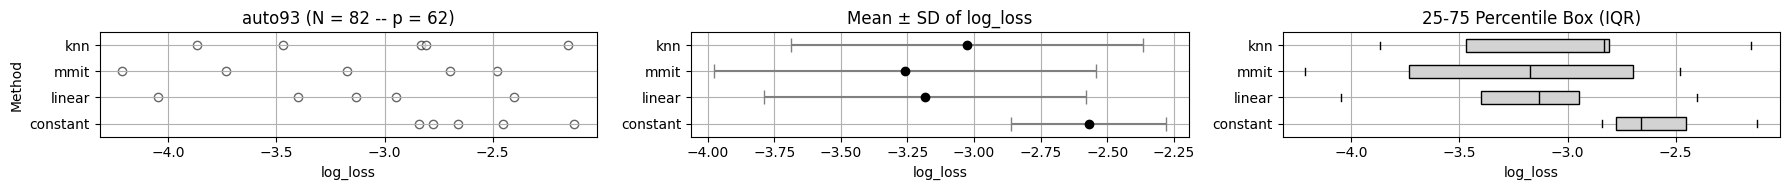

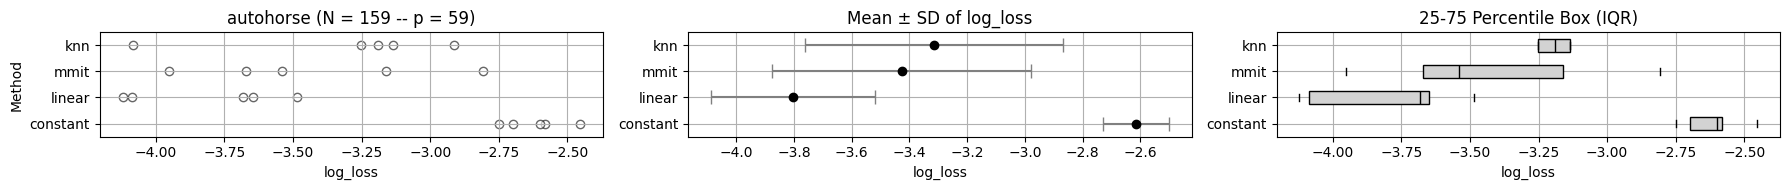

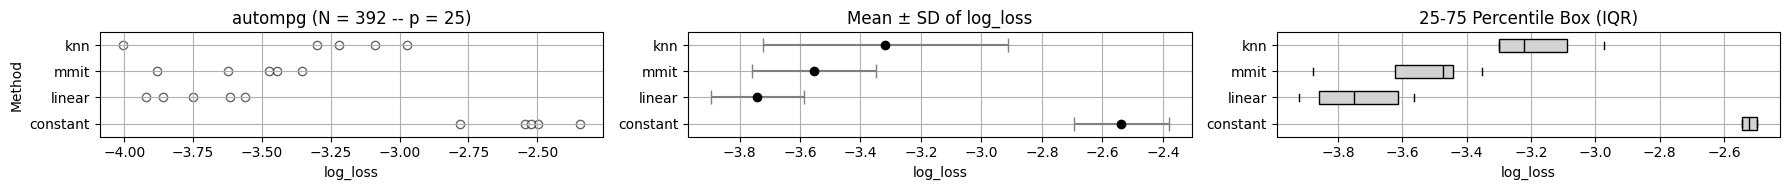

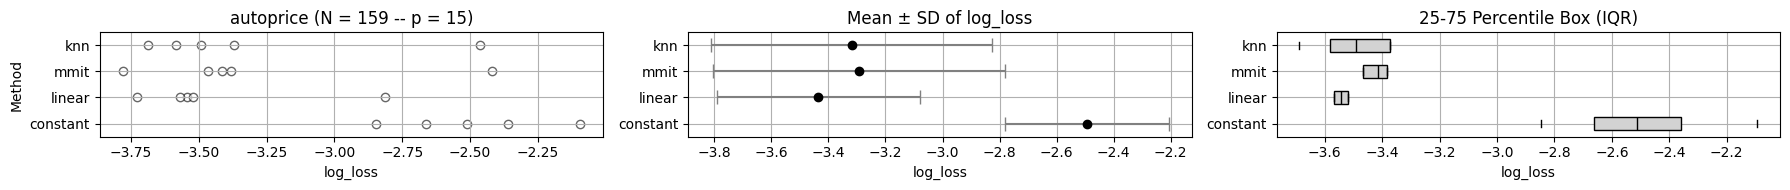

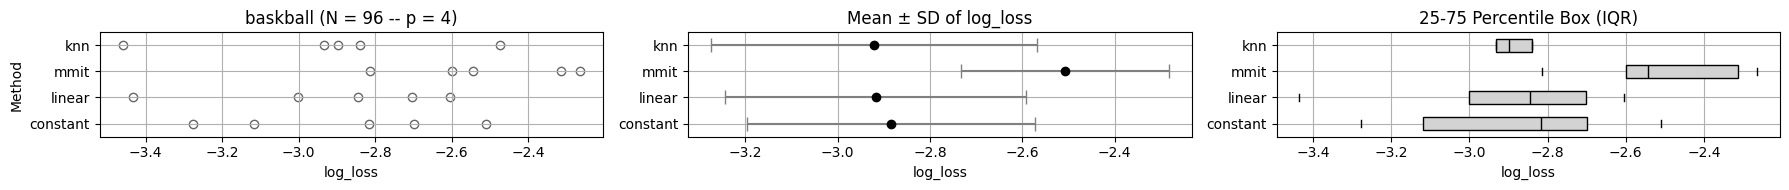

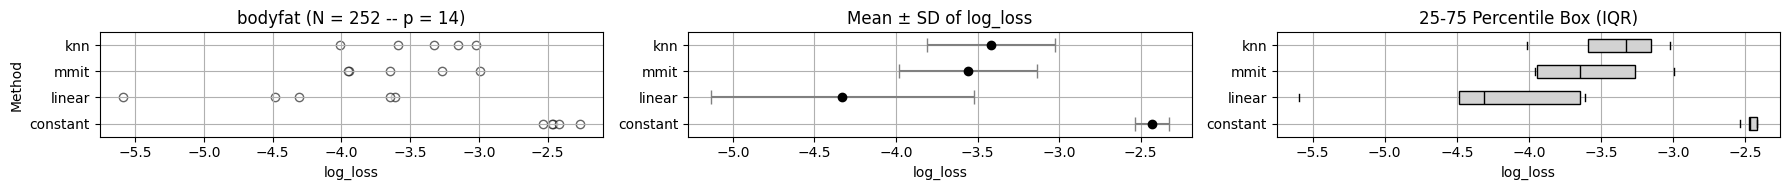

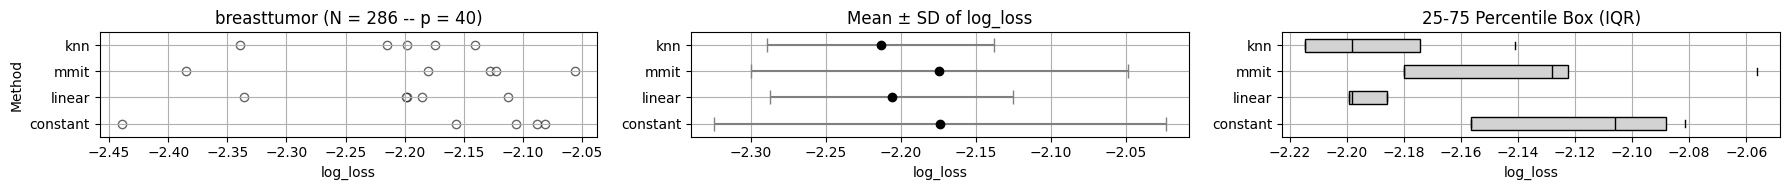

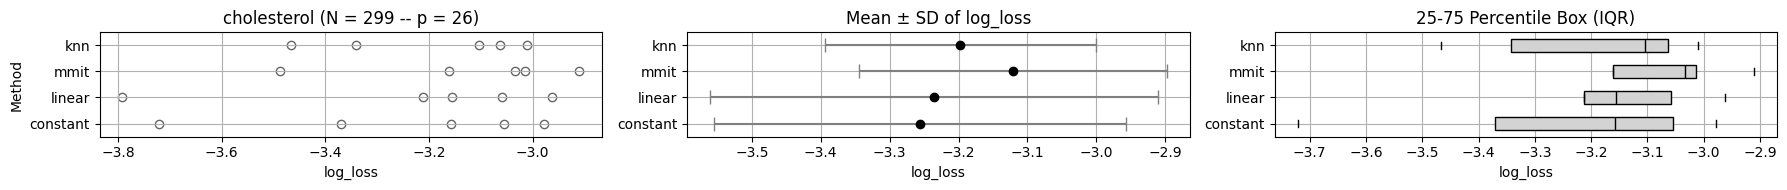

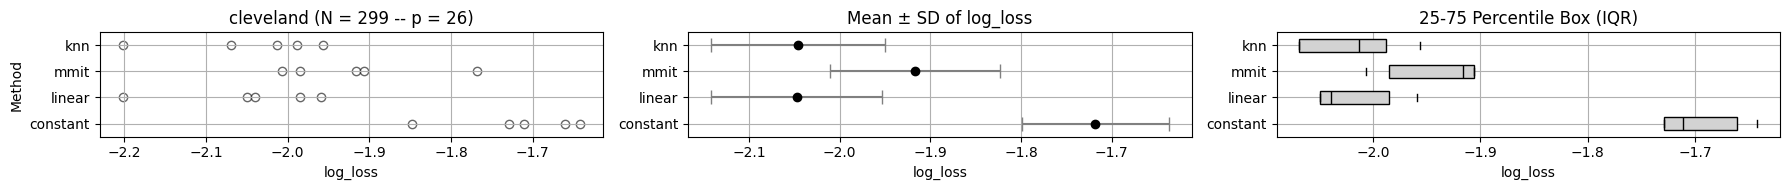

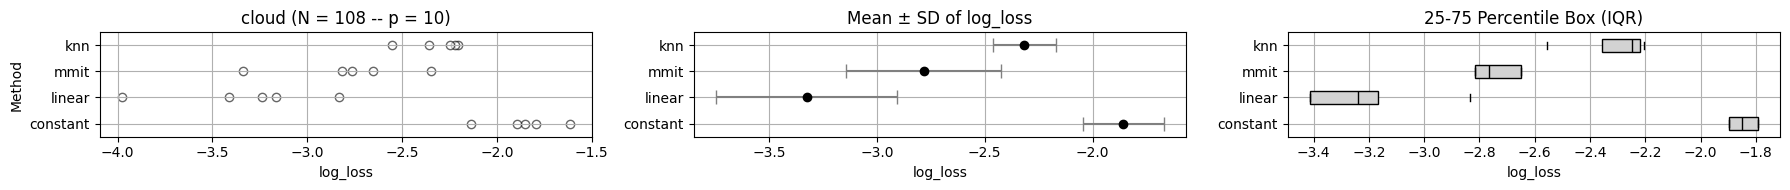

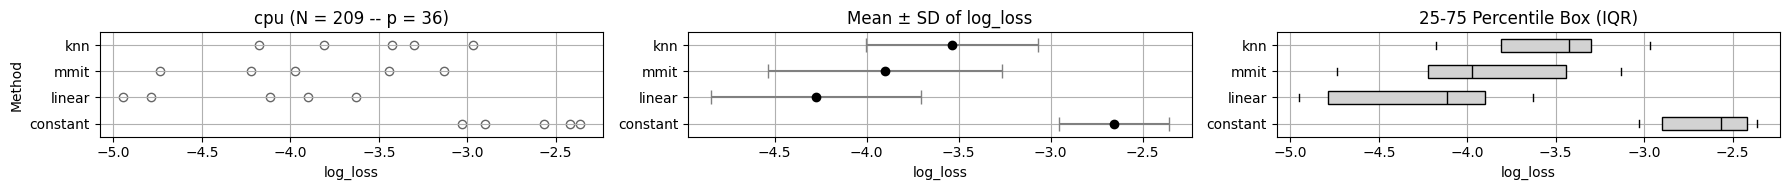

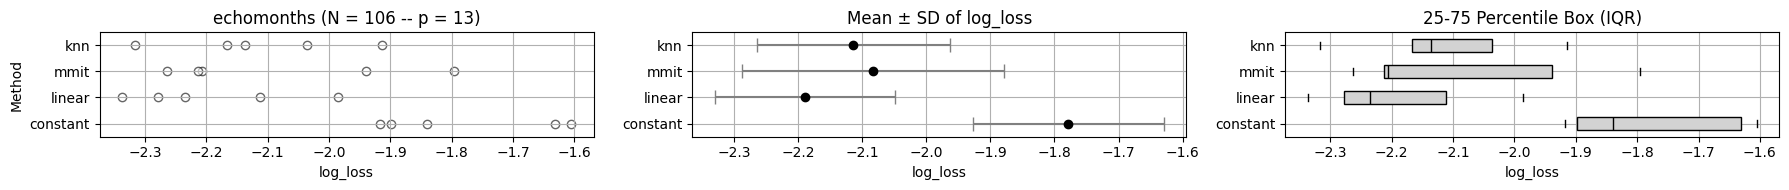

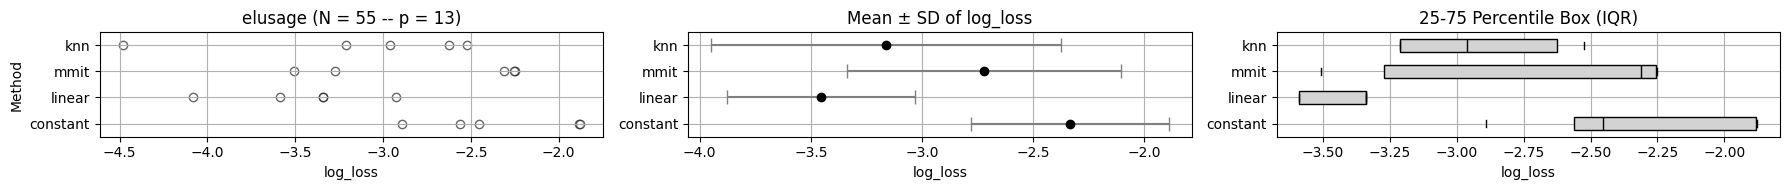

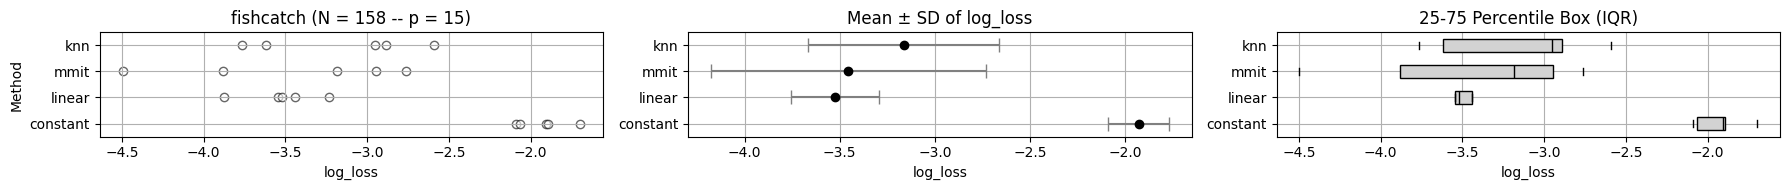

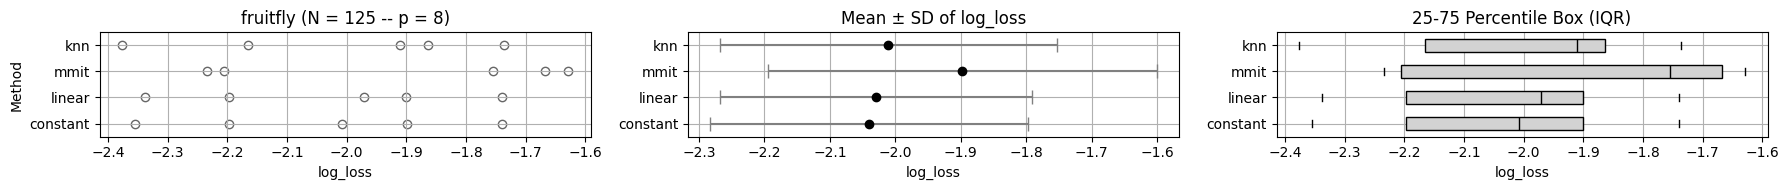

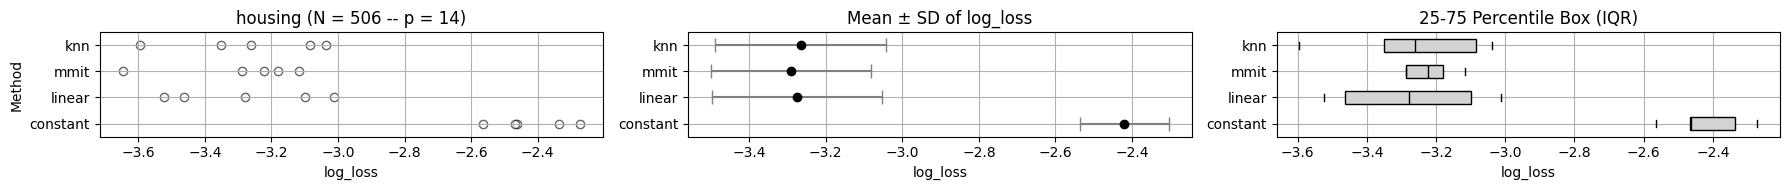

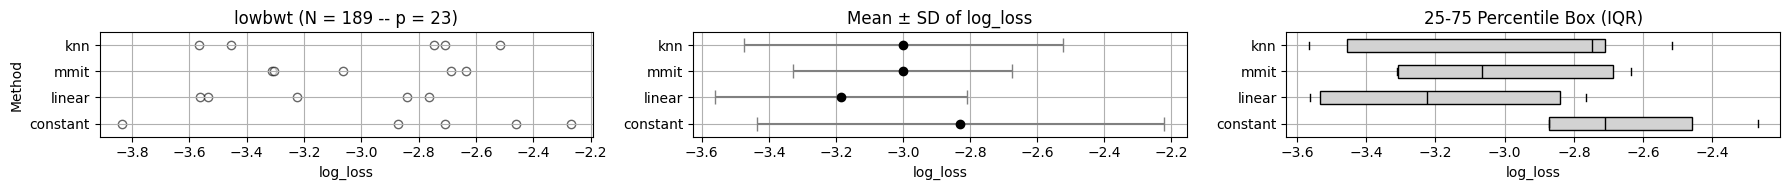

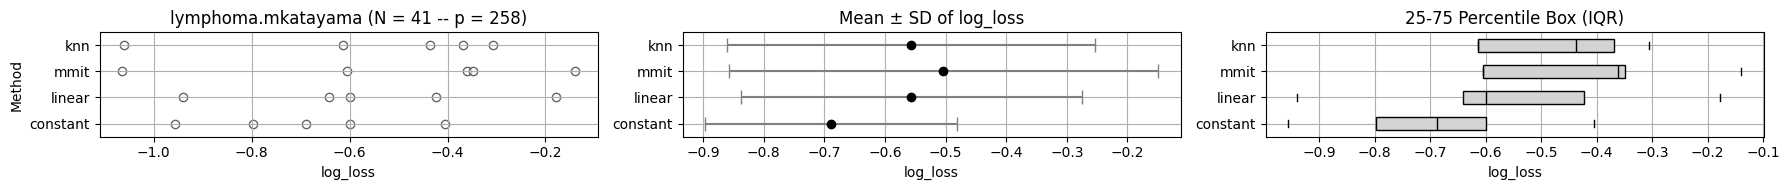

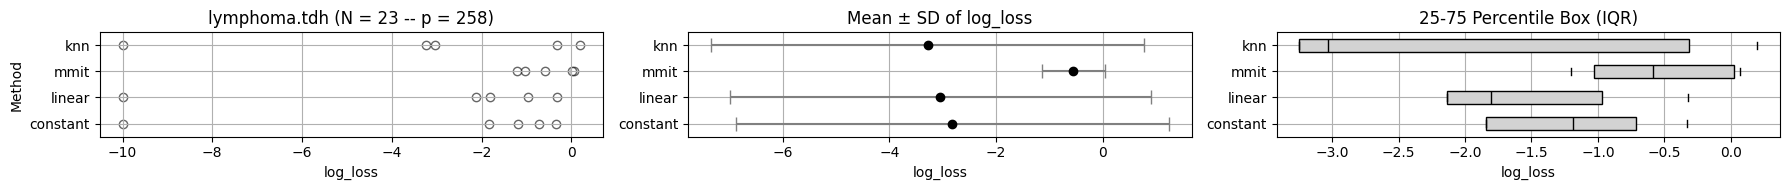

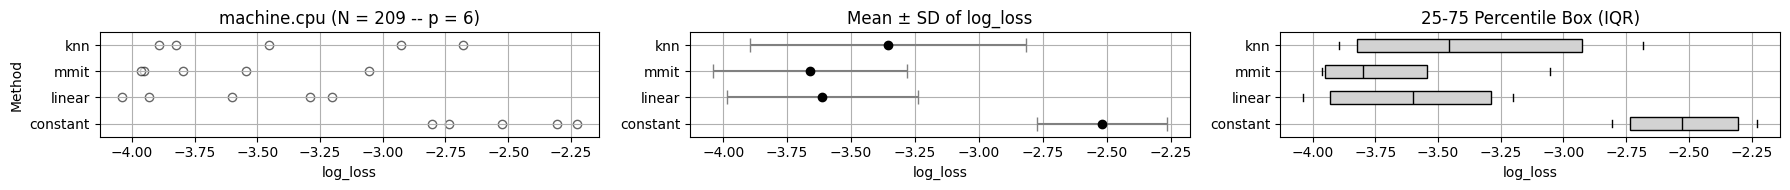

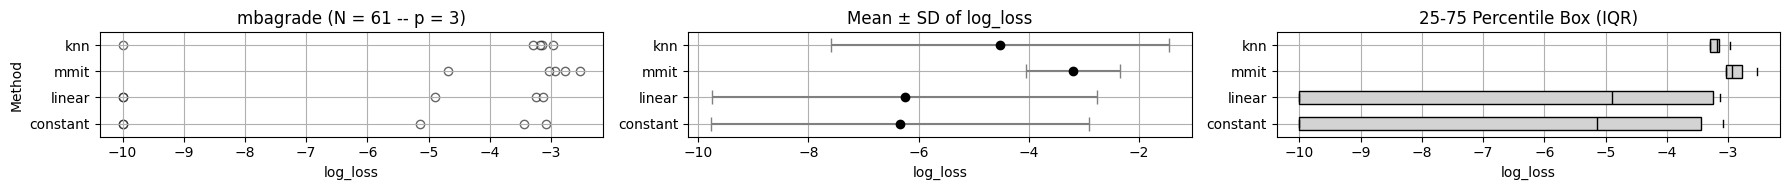

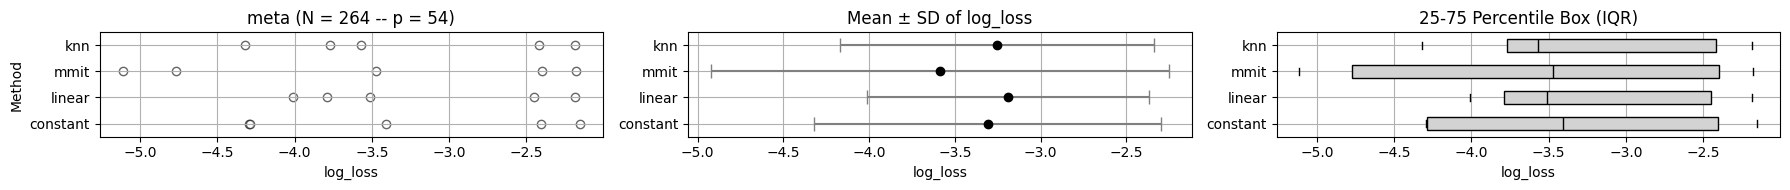

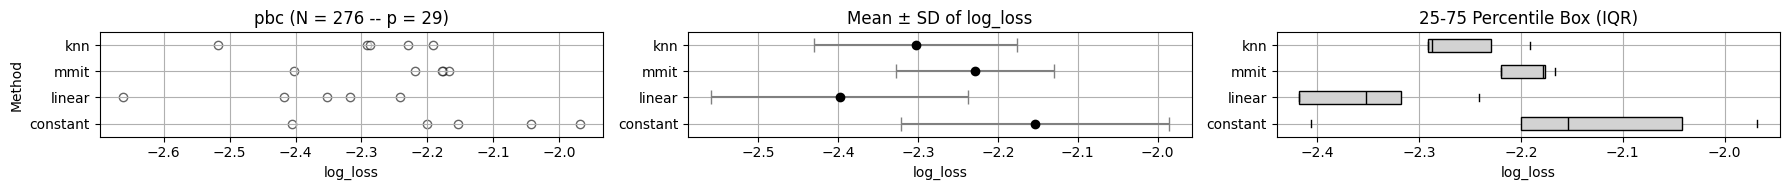

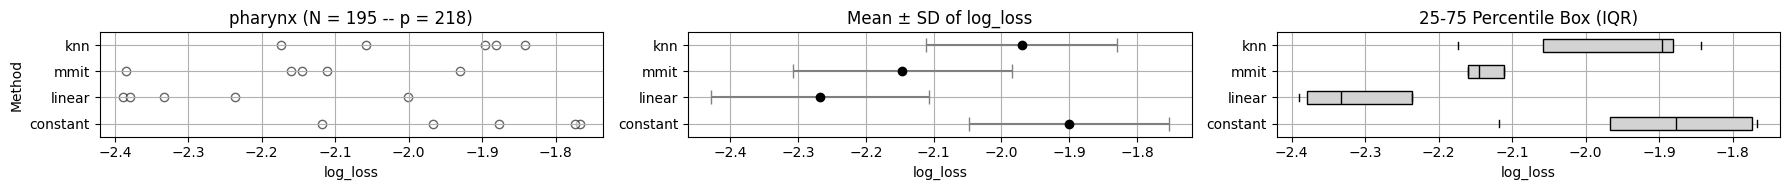

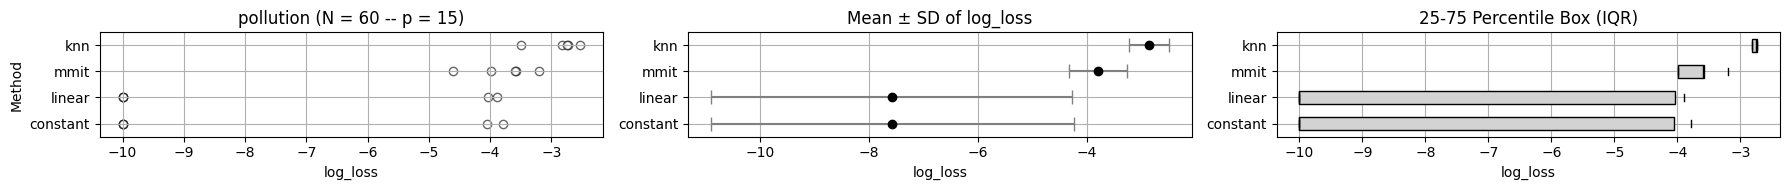

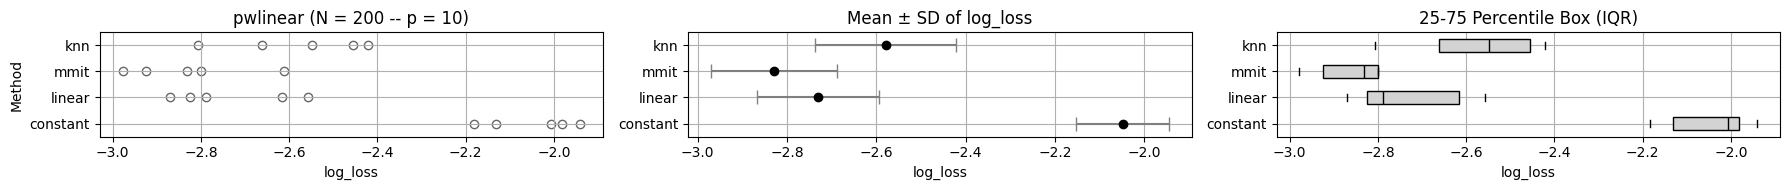

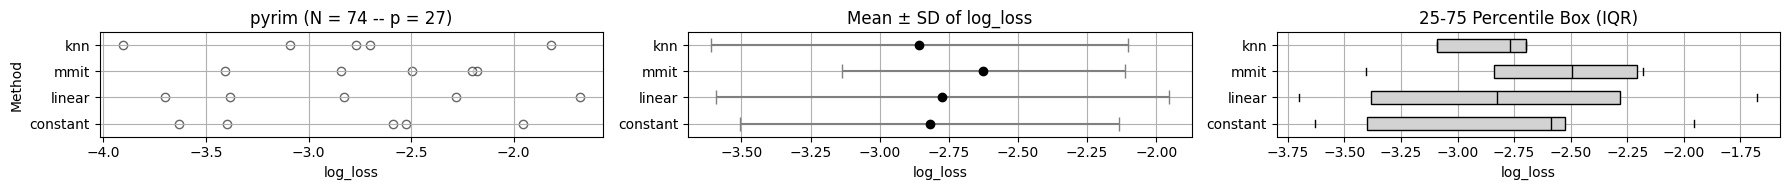

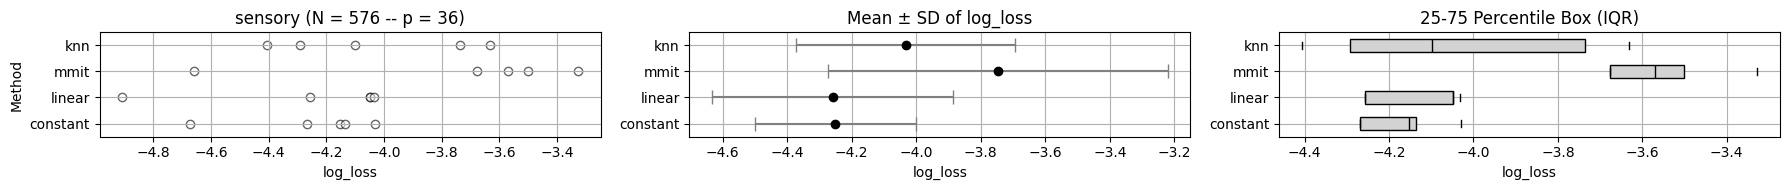

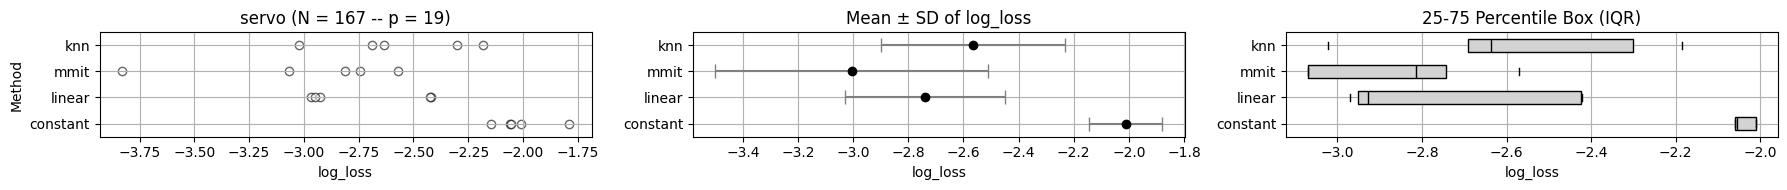

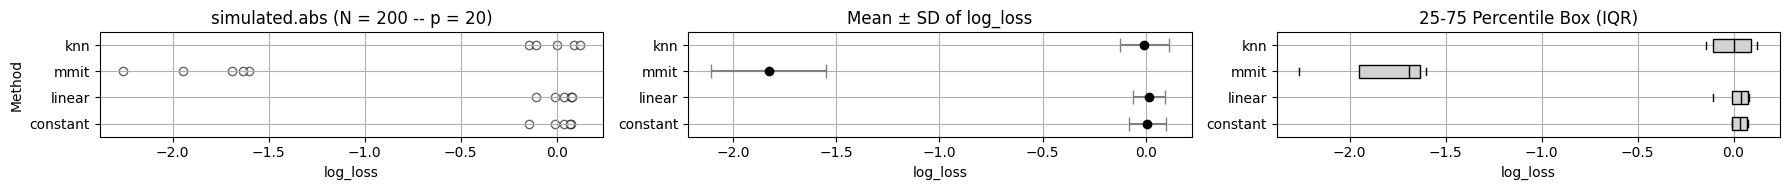

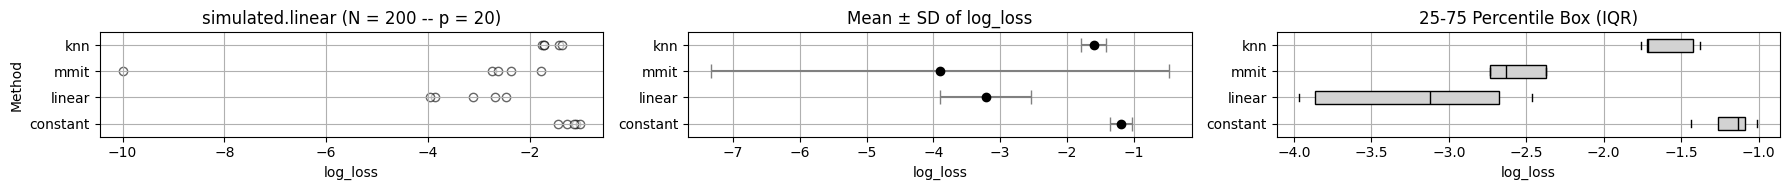

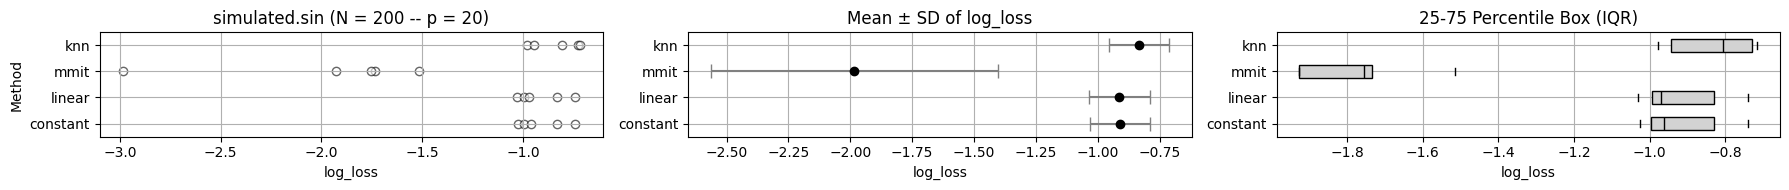

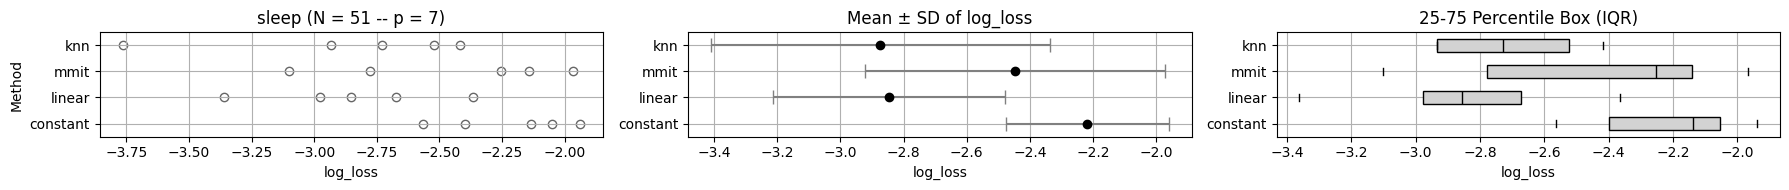

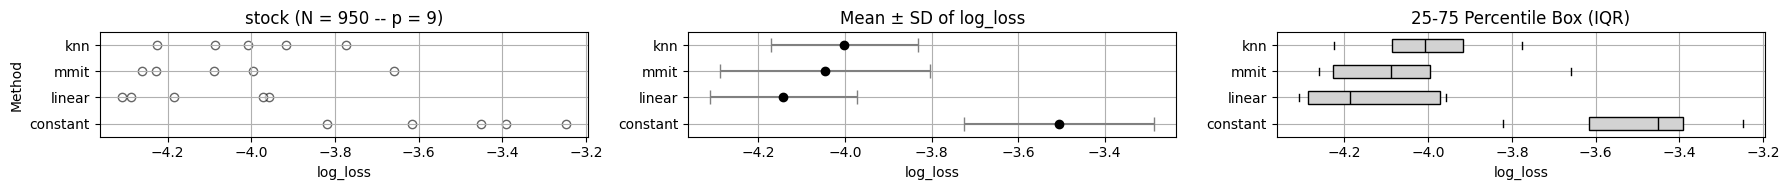

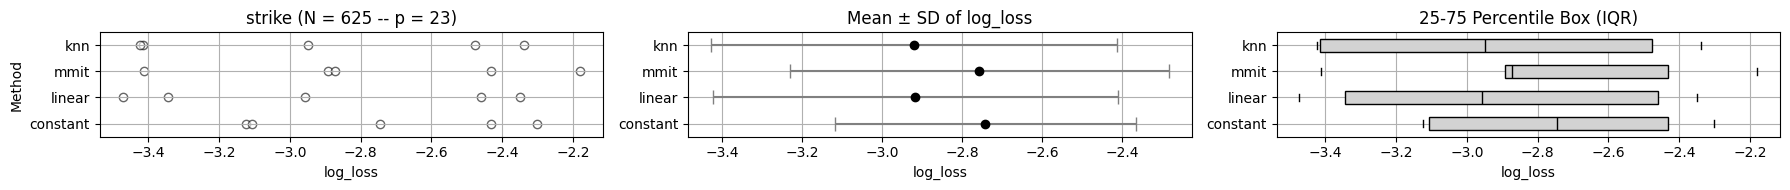

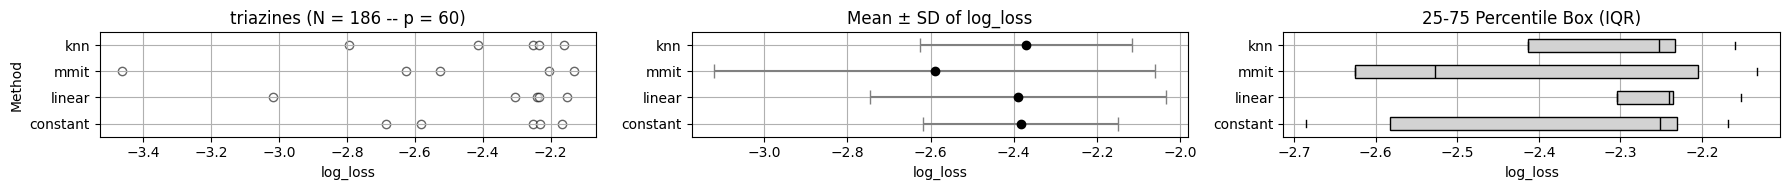

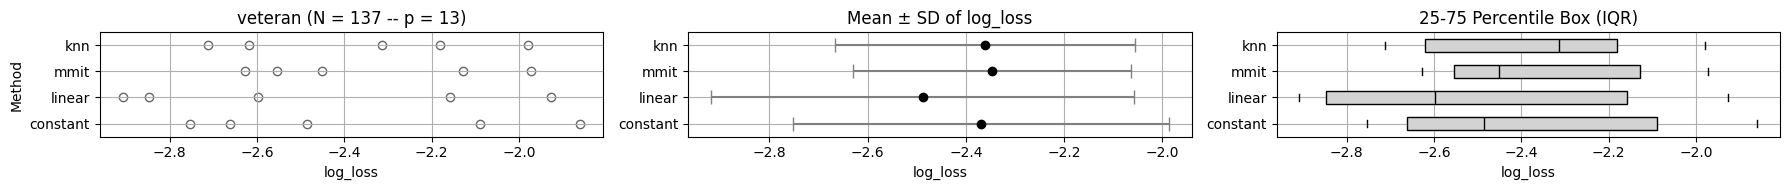

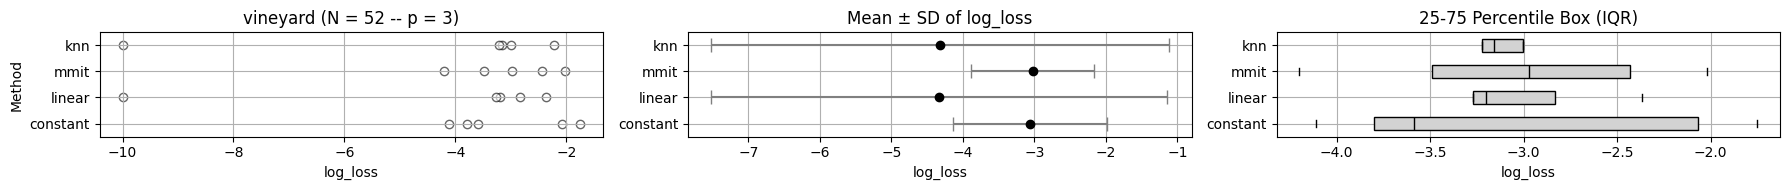

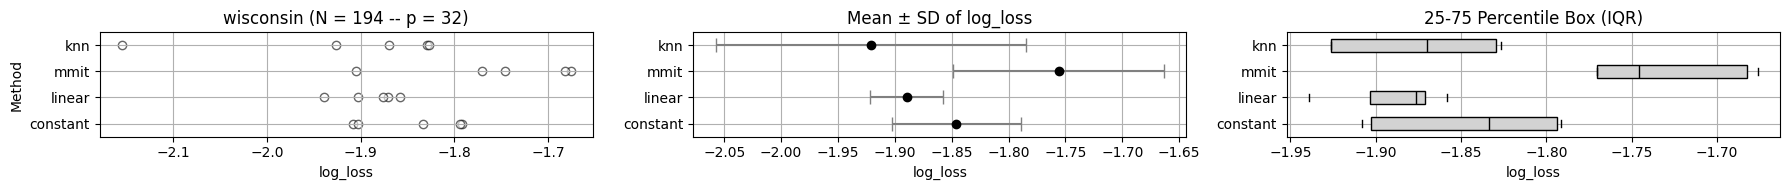

In [4]:
for dataset in datasets:
    plot(dataset)